<a href="https://colab.research.google.com/github/SanyaGuptaa/Shopping-Trends-Analysis/blob/main/AICTE(SHOPPING_TRENDS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AICTE- Internship on AI: Transformative Learning with TechSaksham – A joint CSR initiative of Microsoft & SAP, focusing on AI Technologies. Project - Identifying Shopping Trends using Data Analysis By Sanya Gupta**

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [58]:
shop=pd.read_csv("shopping_trends_updated.csv")
shop.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [59]:
shop.dtypes

,0
Customer ID,int64
Age,int64
Gender,object
Item Purchased,object
Category,object
Purchase Amount (USD),int64
Location,object
Size,object
Color,object
Season,object


In [60]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [61]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [62]:
shop.shape

(3900, 18)

In [63]:
shop.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


# **1.What is the overall distribution of customer ages in the dataset?**

In [64]:
shop['Age'].value_counts()

,count
Age,
69,88
57,87
41,86
25,85
49,84
50,83
54,83
27,83
62,83


In [65]:
shop['Age'].mean()

44.06846153846154

In [66]:
shop['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [67]:
shop['Age_category']=pd.cut(shop['Age'],bins=[0,15,18,30,50,70],labels=['child','teen','Young Adults','Middle-Aged Adults','old'])

In [68]:
fig=px.histogram(shop,y='Age',x='Age_category')
fig.show()

# **2.How does the average purchase amount vary across different product categories?**

In [69]:
shop['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [70]:
shop.groupby('Category')['Purchase Amount (USD)'].mean()

,Purchase Amount (USD)
Category,
Accessories,59.838710
Clothing,60.025331
Footwear,60.255426
Outerwear,57.172840


# **3.Which gender has the highest number of purchases?**

<Axes: xlabel='Gender', ylabel='Purchase Amount (USD)'>

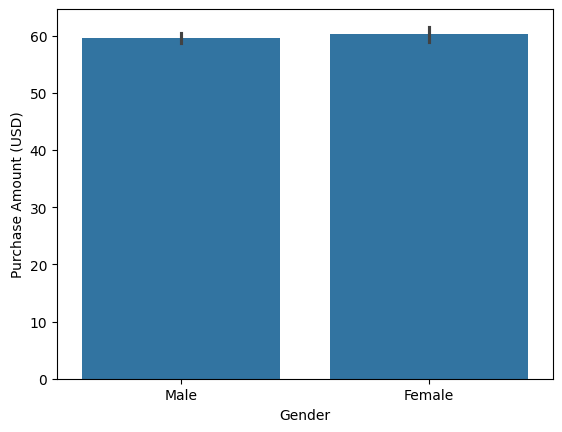

In [71]:
sns.barplot(shop , x = 'Gender' , y = 'Purchase Amount (USD)')

# **4th.What are the most commonly purchased items in each category?**

In [72]:
shop.groupby('Category')['Item Purchased'].value_counts()

Category     Item Purchased
Accessories  Jewelry           171
             Belt              161
             Sunglasses        161
             Scarf             157
             Hat               154
             Handbag           153
             Backpack          143
             Gloves            140
Clothing     Blouse            171
             Pants             171
             Shirt             169
             Dress             166
             Sweater           164
             Socks             159
             Skirt             158
             Shorts            157
             Hoodie            151
             T-shirt           147
             Jeans             124
Footwear     Sandals           160
             Shoes             150
             Sneakers          145
             Boots             144
Outerwear    Jacket            163
             Coat              161
Name: count, dtype: int64

In [73]:
fig=px.histogram(shop,x='Item Purchased',color= 'Category')
fig.show()

# **5 Are there any specific seasons or months where customer spending is significantly higher?**


In [74]:
shop['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [75]:
shop[shop['Season'] == 'Summer'].value_counts().sum()

955

In [76]:
shop[shop['Season'] == 'Winter'].value_counts().sum()

971

In [77]:
shop[shop['Season'] == 'Spring'].value_counts().sum()

999

In [78]:
shop[shop['Season'] == 'Fall'].value_counts().sum()

975

In [79]:
fig = px.histogram(shop , x = 'Season' , range_y= [200 , 1500] )

fig.show()

# **6 What is the average rating given by customers for each product category?**



In [80]:
shop_groupby = shop.groupby('Category')['Review Rating'].mean().reset_index()

In [81]:
fig = px.bar(shop_groupby ,x= 'Category' , y = 'Review Rating' )
fig.show()

# **7 Are there any notable differences in purchase behavior between subscribed and non-subscribed customers?**

In [82]:
shop['Subscription Status'].unique()

array(['Yes', 'No'], dtype=object)

<Axes: xlabel='Subscription Status', ylabel='Purchase Amount (USD)'>

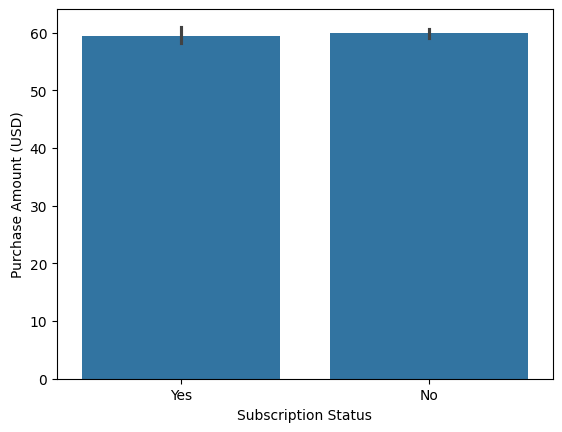

In [83]:
sns.barplot(shop  , x = 'Subscription Status' , y = 'Purchase Amount (USD)')

In [84]:
shop['Purchase Amount (USD)'].sum()

233081

In [85]:
shop.groupby('Subscription Status')['Purchase Amount (USD)'].mean()

,Purchase Amount (USD)
Subscription Status,
No,59.865121
Yes,59.491928


# **8 Which payment method is the most popular among customers?**

In [86]:
shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().sort_values(ascending= False)

,Purchase Amount (USD)
Payment Method,
Debit Card,60.915094
Credit Card,60.074516
Bank Transfer,59.712418
Cash,59.704478
PayPal,59.245199
Venmo,58.949527


In [87]:
shop_groupby = shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().reset_index()

In [88]:
fig = px.bar(shop_groupby , x = 'Payment Method' , y = 'Purchase Amount (USD)')
fig.show()

<Axes: xlabel='Payment Method', ylabel='Purchase Amount (USD)'>

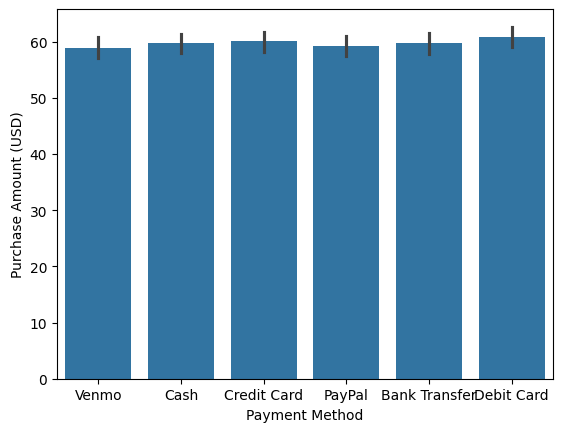

In [89]:
sns.barplot(shop ,x='Payment Method' , y = 'Purchase Amount (USD)')

# **9 Do customers who use promo codes tend to spend more than those who don't?**

In [90]:
shop_groupby  = shop.groupby('Promo Code Used')['Purchase Amount (USD)'].sum().reset_index()

In [91]:
fig = px.sunburst(shop , path=['Gender' , 'Promo Code Used'] , values='Purchase Amount (USD)')
fig.show()

In [92]:
fig  =  px.bar(shop_groupby , x= 'Promo Code Used' , y = 'Purchase Amount (USD)')
fig.show()

# **10 How does the frequency of purchases vary across different age groups?**



In [93]:
shop[['Age' , 'Age_category']]

,Age,Age_category
0,55,old
1,19,Young Adults
2,50,Middle-Aged Adults
3,21,Young Adults
4,45,Middle-Aged Adults
...,...,...
3895,40,Middle-Aged Adults
3896,52,old
3897,46,Middle-Aged Adults
3898,44,Middle-Aged Adults


In [94]:
shop['Age_category'].unique()

['old', 'Young Adults', 'Middle-Aged Adults', 'teen']
Categories (5, object): ['child' < 'teen' < 'Young Adults' < 'Middle-Aged Adults' < 'old']

In [95]:
shop_group = shop.groupby('Frequency of Purchases')['Age'].sum()

In [96]:
px.sunburst(shop , path=['Frequency of Purchases','Age_category'] , values='Age')

/usr/local/lib/python3.11/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



# **11 Are there any correlations between the size of the product and the purchase amount?**

In [97]:
shop_group = shop.groupby('Size')['Purchase Amount (USD)'].sum().reset_index()

In [98]:
fig  = px.bar(shop_group , x = 'Size' , y ='Purchase Amount (USD)'  )
fig.show()

# **12 Which shipping type is preferred by customers for different product categories?**

In [99]:
shop.groupby('Category')['Shipping Type'].value_counts().sort_values(ascending= False)

Category     Shipping Type 
Clothing     Standard          297
             Free Shipping     294
             Next Day Air      293
             Express           290
             Store Pickup      282
             2-Day Shipping    281
Accessories  Store Pickup      217
             Next Day Air      211
             Standard          208
             2-Day Shipping    206
             Express           203
             Free Shipping     195
Footwear     Free Shipping     122
             Standard          100
             Store Pickup       98
             Express            96
             Next Day Air       93
             2-Day Shipping     90
Outerwear    Free Shipping      64
             Express            57
             Store Pickup       53
             Next Day Air       51
             2-Day Shipping     50
             Standard           49
Name: count, dtype: int64

In [100]:
shop['Shipping_Category'] =shop['Shipping Type'].map({'Express': 0, 'Free Shipping': 1, 'Next Day Air': 2,
                                                       'Standard': 3, '2-Day Shipping': 4, 'Store Pickup': 5})

In [101]:
shop['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [102]:
shop['Category_num'] =shop['Category'].map({'Clothing':1, 'Footwear':2, 'Outerwear':3, 'Accessories':4})

# **13 How does the presence of a discount affect the purchase decision of customers?**

In [103]:
shop_group = shop.groupby('Discount Applied')['Purchase Amount (USD)'].sum().reset_index()

In [104]:
px.histogram(shop_group , x = 'Discount Applied' , y = 'Purchase Amount (USD)')

In [105]:
fig = px.sunburst(shop , path = ['Gender' , 'Discount Applied'], values='Purchase Amount (USD)' , color= 'Gender')

fig.show()

# **14 Are there any specific colors that are more popular among customers?**

In [106]:
px.histogram(shop , x = 'Color')

In [107]:
shop['Color'].value_counts().nlargest(5)

,count
Color,
Olive,177
Yellow,174
Silver,173
Teal,172
Green,169


# **15 What is the average number of previous purchases made by customers?**

In [108]:
shop['Previous Purchases'].mean()

25.35153846153846